<a href="https://colab.research.google.com/github/DS3001/group14/blob/main/Colette_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [4]:
df = pd.read_csv('/content/df_cleaned.csv')

# Create a mapping for the Attendance text values to numerical values on a scale from 0-8, with 0 being never and 8 being very often
mapping = {
    "Never": 0,
    "Less than once a year": 1,
    "About once or twice a year": 2,
    "Several times a year": 3,
    "About once a month": 4,
    "2-3 times a month": 5,
    "Nearly every week": 6,
    "Every week": 7,
    "Several times a week": 8
}

df['ATTEND'] = df['ATTEND'].map(mapping)

In [ ]:
df.head()

,RELIG,CHILDS,AGEKDBRN,EDUC,HAPPY,ATTEND,GOD,INCOME16,FAMGEN,RELIG16,RELITEN,DEGREE,AGE,SEX,RACE,MARITAL,POLVIEWS,HRS1
0,CHRISTIAN,0.0,NaN,14.0,2.0,5.0,6.0,NaN,1.0,PROTESTANT,Strong,Associate/junior college,43.0,1.0,1.0,5.0,6.0,NaN
1,CATHOLIC,3.0,21.0,10.0,1.0,2.0,6.0,16.0,2.0,CATHOLIC,Strong,High school,74.0,2.0,1.0,4.0,NaN,NaN
2,NONE,2.0,35.0,16.0,1.0,2.0,5.0,25.0,2.0,CATHOLIC,No religion,Bachelor's,42.0,1.0,1.0,1.0,5.0,40.0
3,PROTESTANT,2.0,32.0,16.0,1.0,6.0,6.0,26.0,1.0,CATHOLIC,Strong,Bachelor's,63.0,2.0,1.0,1.0,4.0,40.0
4,CATHOLIC,0.0,NaN,18.0,2.0,8.0,6.0,26.0,1.0,CATHOLIC,Strong,Graduate,71.0,1.0,2.0,3.0,7.0,NaN


# Religion and General Happiness

In [ ]:
happy_stats = df.groupby('RELIG')['HAPPY'].describe()
happy_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,1.736842,0.653376,1.0,1.00,2.0,2.00,3.0
CATHOLIC,488.0,1.801230,0.653091,1.0,1.00,2.0,2.00,3.0
CHRISTIAN,29.0,1.965517,0.778403,1.0,1.00,2.0,3.00,3.0
HINDUISM,8.0,1.750000,0.707107,1.0,1.00,2.0,2.00,3.0
INTER-NONDENOMINATIONAL,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
JEWISH,39.0,1.564103,0.552262,1.0,1.00,2.0,2.00,3.0
MUSLIM/ISLAM,16.0,1.875000,0.806226,1.0,1.00,2.0,2.25,3.0
NAN,11.0,1.727273,0.467099,1.0,1.50,2.0,2.00,2.0
NATIVE AMERICAN,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


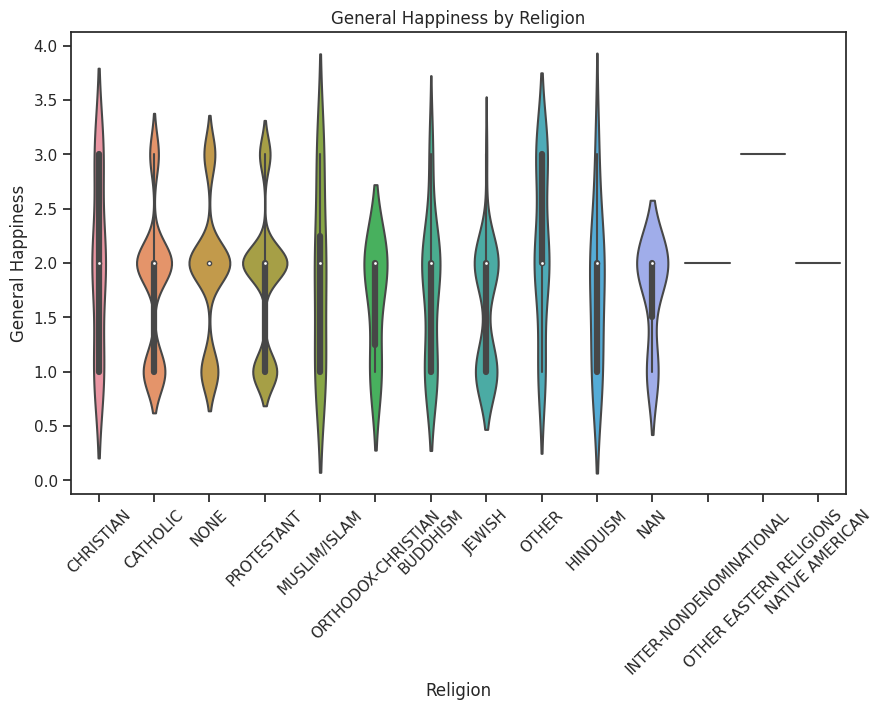

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RELIG', y='HAPPY', data=df)
plt.xlabel('Religion')
plt.ylabel('General Happiness')
plt.title('General Happiness by Religion')
plt.xticks(rotation=45)
plt.show()

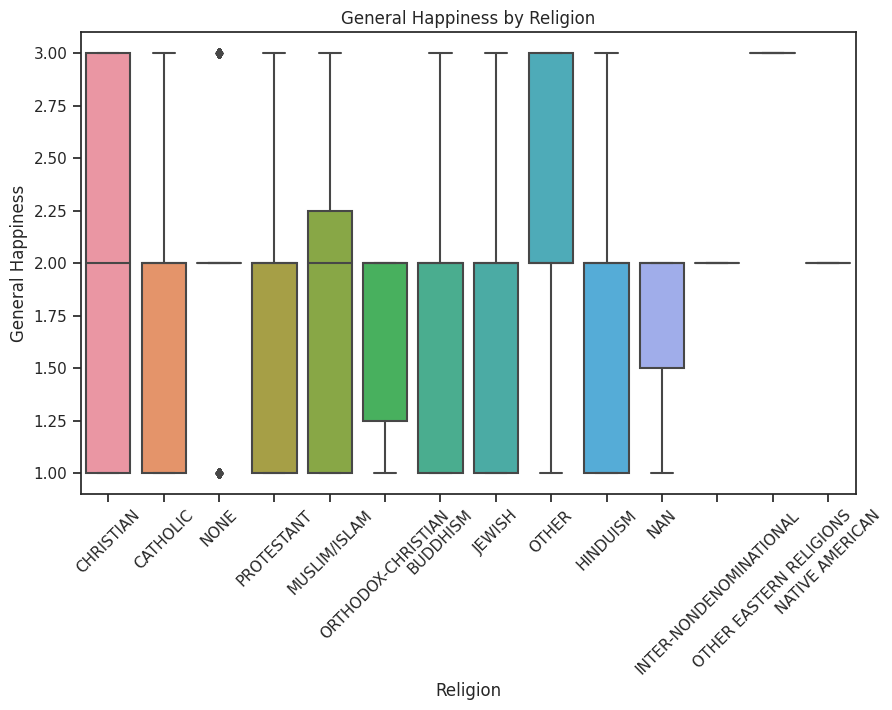

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RELIG', y='HAPPY', data=df)
plt.xlabel('Religion')
plt.ylabel('General Happiness')
plt.title('General Happiness by Religion')
plt.xticks(rotation=45)
plt.show()

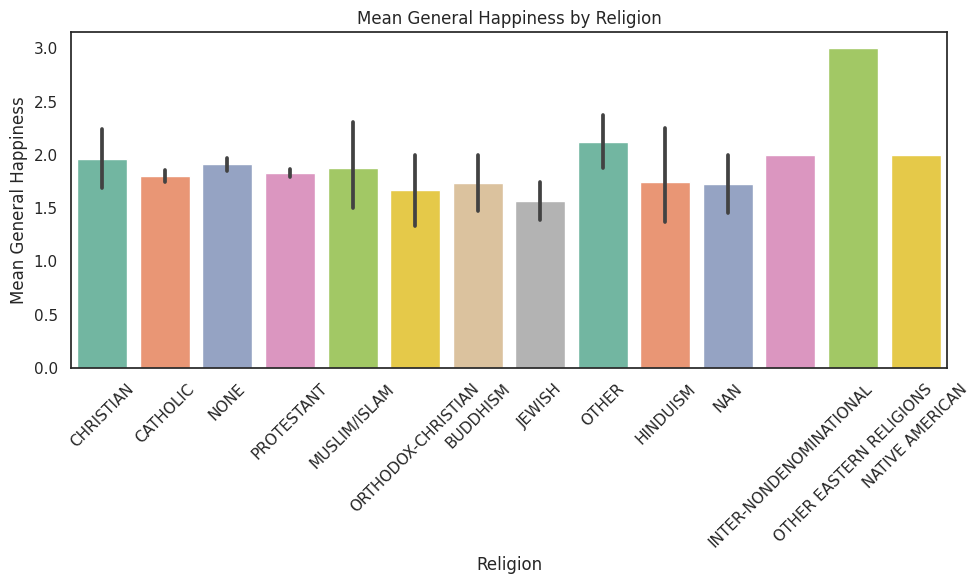

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RELIG', y='HAPPY', data=df, palette='Set2')
plt.xlabel('Religion')
plt.ylabel('Mean General Happiness')
plt.title('Mean General Happiness by Religion')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Religion and Religious Service Attendance

In [ ]:
attend_stats = df.groupby('RELIG')['ATTEND'].describe()
attend_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,2.157895,2.794104,0.0,0.00,0.0,4.50,8.0
CATHOLIC,485.0,3.430928,2.539334,0.0,2.00,3.0,6.00,8.0
CHRISTIAN,28.0,3.928571,3.029834,0.0,0.75,4.0,7.00,8.0
HINDUISM,8.0,3.000000,2.725541,0.0,1.50,2.5,4.00,7.0
INTER-NONDENOMINATIONAL,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
JEWISH,39.0,2.974359,2.230025,0.0,2.00,3.0,4.00,8.0
MUSLIM/ISLAM,16.0,3.187500,2.880249,0.0,0.00,2.5,6.25,7.0
NAN,9.0,3.777778,2.905933,0.0,2.00,3.0,6.00,8.0
NATIVE AMERICAN,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0


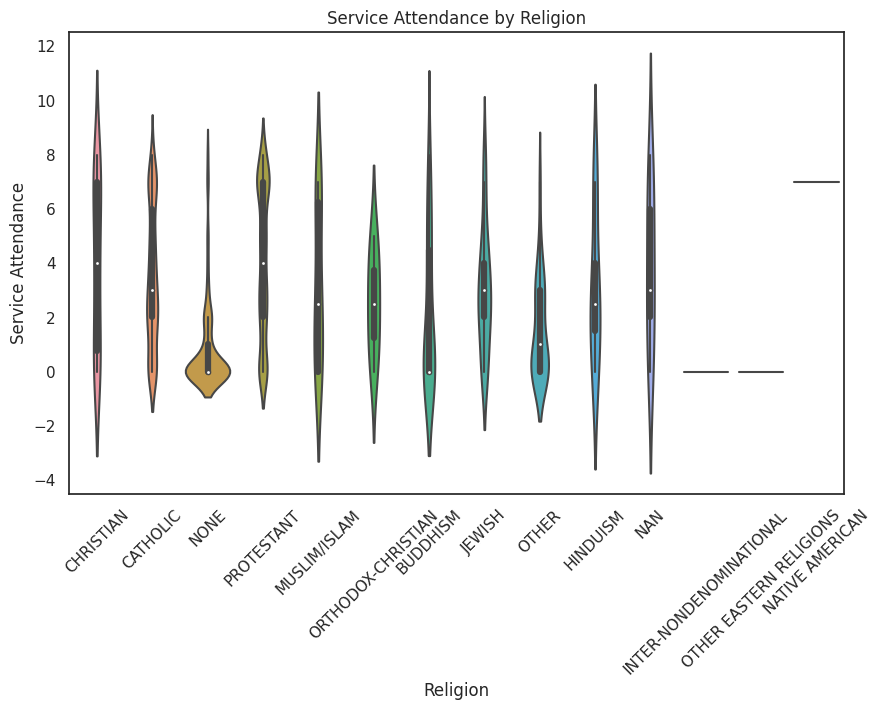

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RELIG', y='ATTEND', data=df)
plt.xlabel('Religion')
plt.ylabel('Service Attendance')
plt.title('Service Attendance by Religion')
plt.xticks(rotation=45)
plt.show()

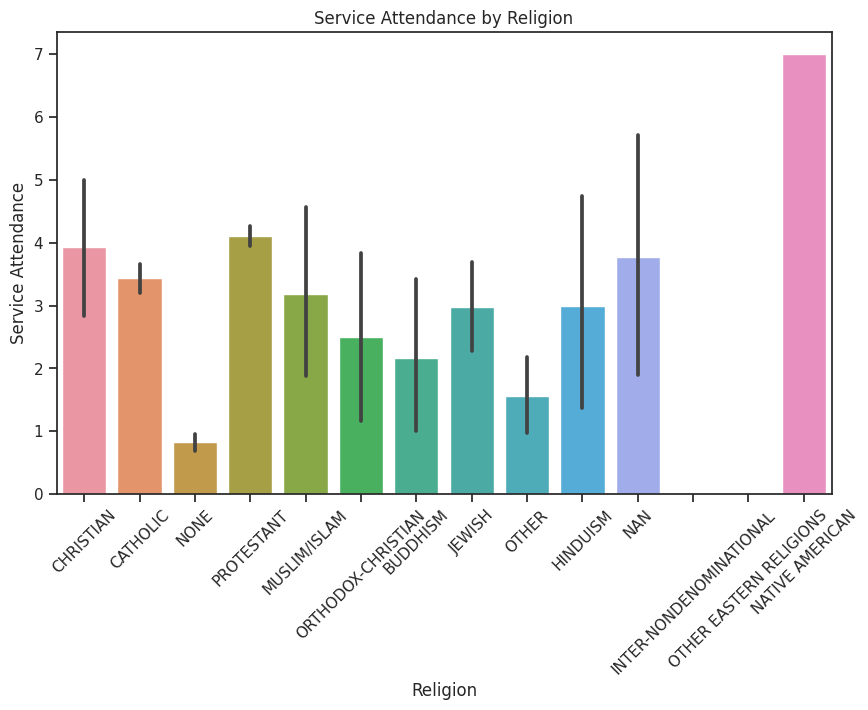

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RELIG', y='ATTEND', data=df)
plt.xlabel('Religion')
plt.ylabel('Service Attendance')
plt.title('Service Attendance by Religion')
plt.xticks(rotation=45)
plt.show()

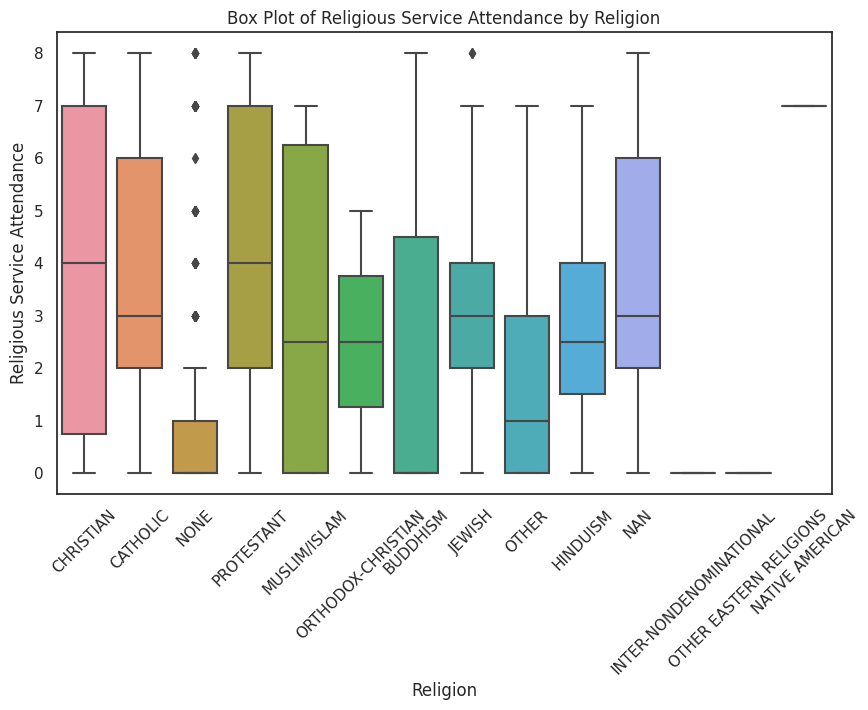

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RELIG', y='ATTEND', data=df)
plt.xlabel('Religion')
plt.ylabel('Religious Service Attendance')
plt.title('Box Plot of Religious Service Attendance by Religion')
plt.xticks(rotation=45)
plt.show()

# Religion and Belief in God

In [ ]:
god_stats = df.groupby('RELIG')['GOD'].describe()
god_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,3.210526,1.583910,1.0,2.00,3.0,4.50,6.0
CATHOLIC,483.0,5.275362,1.068579,1.0,5.00,6.0,6.00,6.0
CHRISTIAN,29.0,5.448276,1.270158,1.0,6.00,6.0,6.00,6.0
HINDUISM,8.0,4.250000,1.908627,2.0,2.75,4.5,6.00,6.0
INTER-NONDENOMINATIONAL,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
JEWISH,39.0,3.846154,1.843030,1.0,2.00,4.0,6.00,6.0
MUSLIM/ISLAM,16.0,5.937500,0.250000,5.0,6.00,6.0,6.00,6.0
NAN,11.0,5.545455,0.522233,5.0,5.00,6.0,6.00,6.0
NATIVE AMERICAN,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0


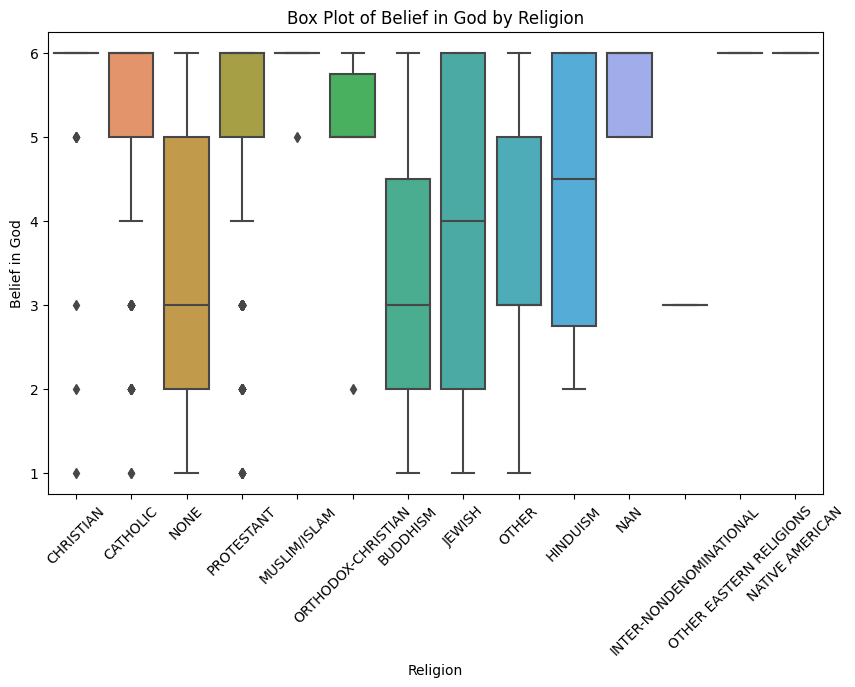

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RELIG', y='GOD', data=df)
plt.xlabel('Religion')
plt.ylabel('Belief in God')
plt.title('Box Plot of Belief in God by Religion')
plt.xticks(rotation=45)
plt.show()

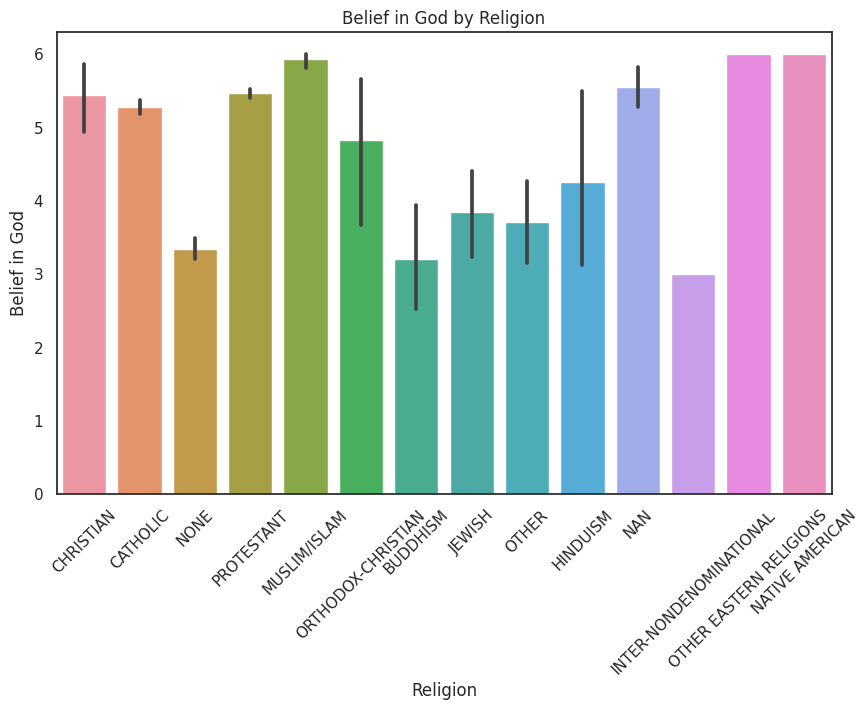

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RELIG', y='GOD', data=df)
plt.xlabel('Religion')
plt.ylabel('Belief in God')
plt.title('Belief in God by Religion')
plt.xticks(rotation=45)
plt.show()

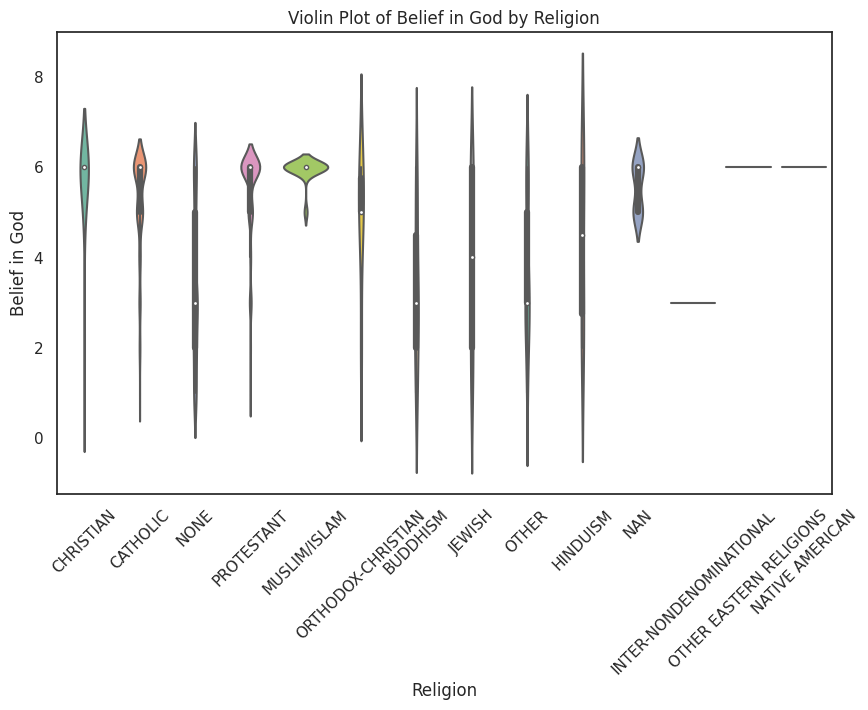

In [25]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='RELIG', y='GOD', data=df, palette='Set2')
plt.xlabel('Religion')
plt.ylabel('Belief in God')
plt.title('Violin Plot of Belief in God by Religion')
plt.xticks(rotation=45)
plt.show()

# Correlation

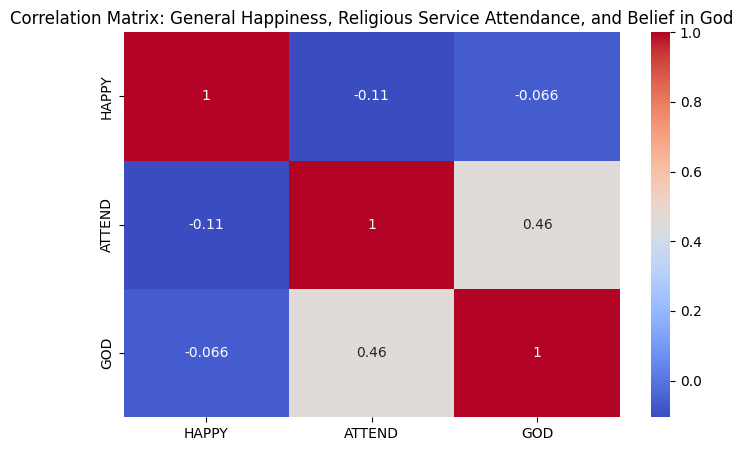

In [ ]:
# Selecting a subset of variables for the correlation matrix
selected_vars = ['HAPPY', 'ATTEND', 'GOD']
correlation_matrix_subset = df[selected_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: General Happiness, Religious Service Attendance, and Belief in God')
plt.show()


Analysis of Correlation Matrix for 'HAPPY', 'ATTEND', 'GOD':

General Happiness and Religious Service Attendance are negatively correlated, General Happiness and Belief in God are negatively correlated, and Belief in God and Religious Service Attendance are positively correlated.